In [ ]:
#!pip install -U parepy-toolbox

  Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from parepy_toolbox import random_sampling

In [4]:
# Geração das amostras
params = {
    'a': {'min': 0.5, 'mode': 1.0, 'max': 2.0},
    'b': {'min': 2.0, 'mode': 3.0, 'max': 4.0},
    'c': {'min': 0.5, 'mode': 1.0, 'max': 1.5},
    'd': {'min': 3.0, 'mode': 4.0, 'max': 5.0},
    'e': {'min': 2.0, 'mode': 3.0, 'max': 6.0},
    'f': {'min': 1.8, 'mode': 2.0, 'max': 4.0},
}

n = 1000
data = {}

for k, p in params.items():
    data[k] = random_sampling(
        dist='triangular',
        parameters=p,
        method='lhs',
        n_samples=n
    )

df = pd.DataFrame(data)
df.head()


,a,b,c,d,e,f
0,1.406381,2.860609,0.908271,3.511949,4.166067,2.673300
1,1.410962,2.140757,0.936023,4.365541,3.261370,2.501833
2,1.020320,2.443939,1.075490,3.355029,3.368112,3.131420
3,1.475936,2.941685,1.272118,3.765922,2.813702,3.255154
4,1.448439,3.169708,0.746717,4.727011,4.427749,2.016051


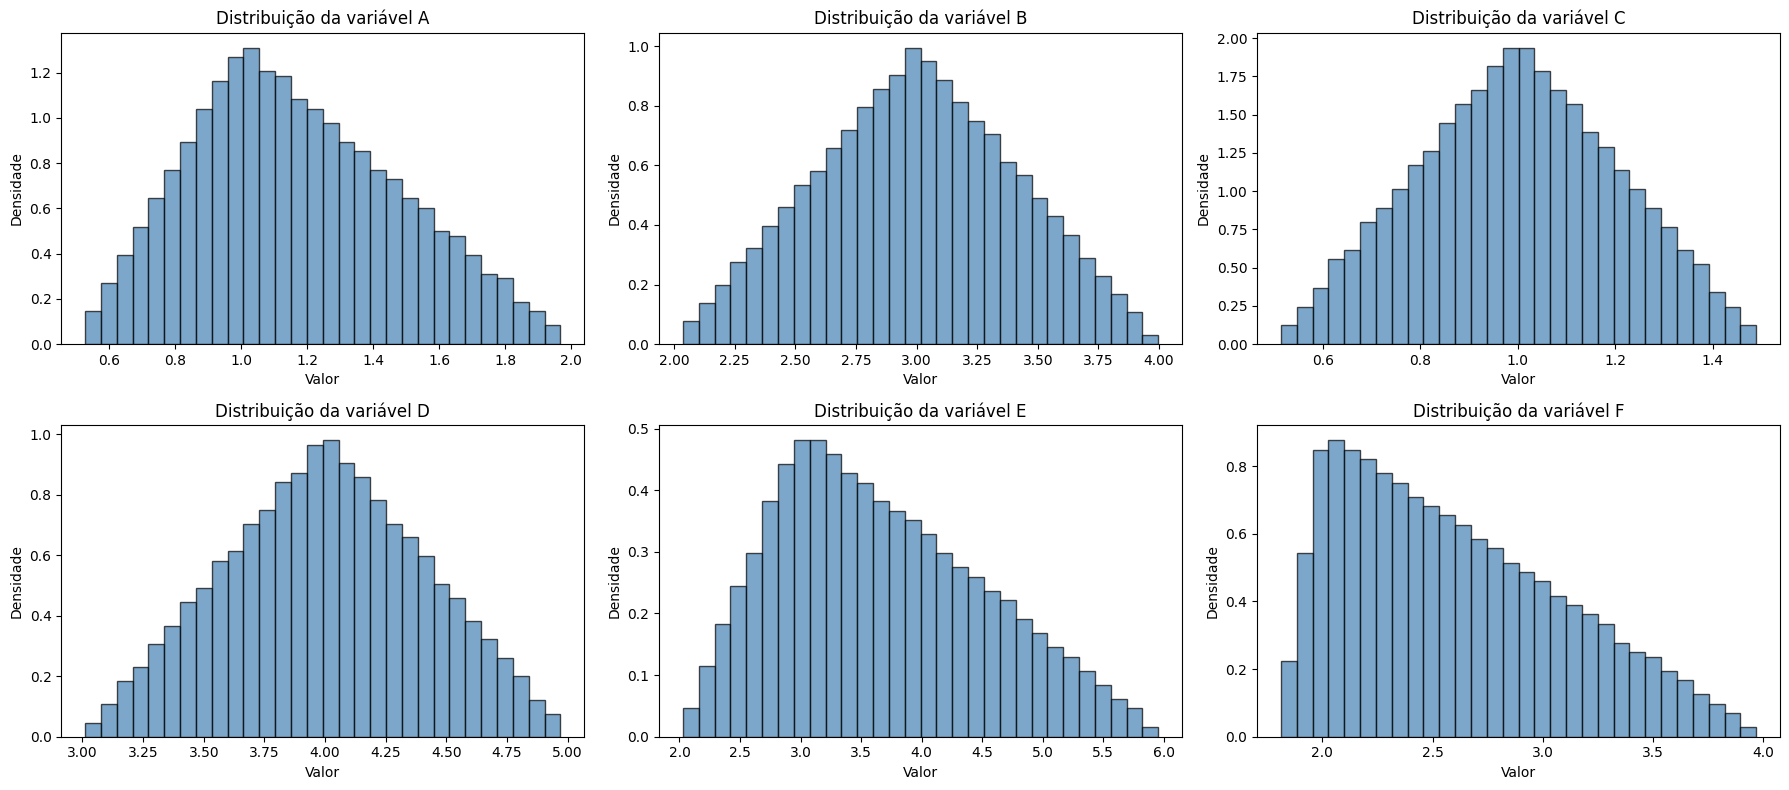

In [5]:
# Plotar histogramas

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=30, color='steelblue', alpha=0.7, edgecolor='black', density=True)
    axs[i].set_title(f'Distribuição da variável {col.upper()}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Densidade')

plt.tight_layout()
plt.show()


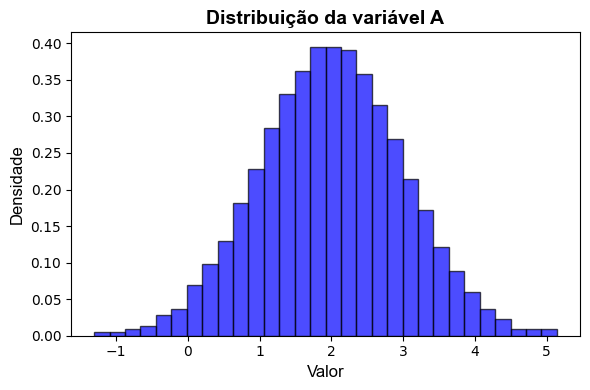

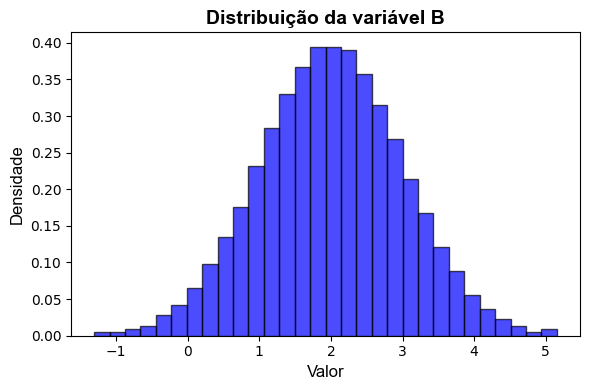

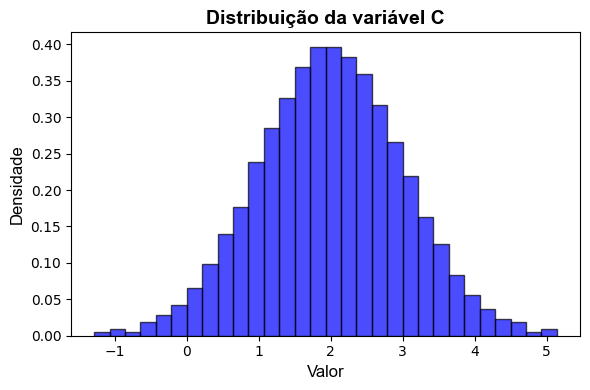

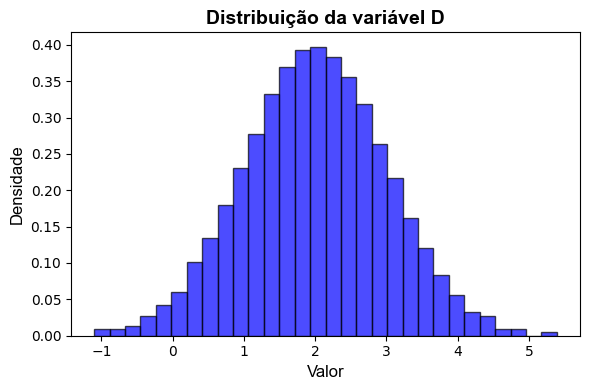

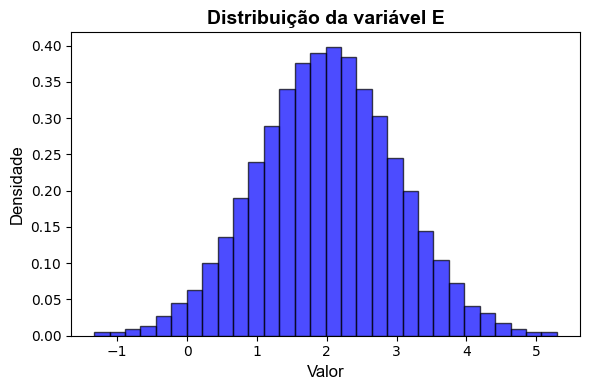

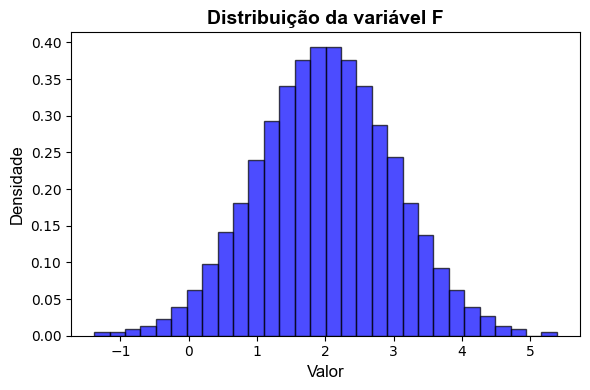

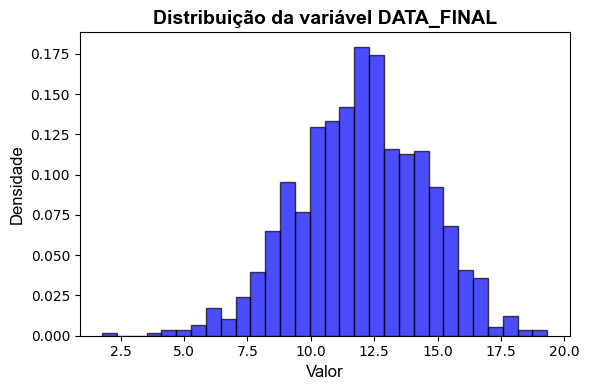

In [27]:
import matplotlib.pyplot as plt

# Parâmetros personalizáveis
fig_size = (6, 4)
bar_color = 'blue'
bar_alpha = 0.7
bar_edgecolor = 'black'

title_font = {'fontsize': 14, 'fontweight': 'bold', 'fontname': 'Arial'}
label_font = {'fontsize': 12, 'fontname': 'Arial'}
tick_fontsize = 10

images = []

for i, col in enumerate(df.columns):
    fig, ax = plt.subplots(figsize=fig_size)

    # Histograma
    ax.hist(df[col], bins=30, color=bar_color, alpha=bar_alpha,
            edgecolor=bar_edgecolor, density=True)

    # Título e labels com fonte personalizada
    ax.set_title(f'Distribuição da variável {col.upper()}', **title_font)
    ax.set_xlabel('Valor', **label_font)
    ax.set_ylabel('Densidade', **label_font)

    # Tamanho das fontes dos ticks (valores nos eixos)
    ax.tick_params(axis='both', labelsize=tick_fontsize)

    plt.tight_layout()
    images.append(fig)


In [23]:
for i, fig in enumerate(images):
    fig.savefig(f"distribuicao_{df.columns[i].lower()}.png", dpi=600, bbox_inches="tight")


In [6]:
# Geração das amostras
params = {
    'a': {'mean': 2.0, 'std': 1.0},
    'b': {'mean': 2.0, 'std': 1.0},
    'c': {'mean': 2.0, 'std': 1.0},
    'd': {'mean': 2.0, 'std': 1.0},
    'e': {'mean': 2.0, 'std': 1.0},
    'f': {'mean': 2.0, 'std': 1.0},
}

n = 1000
data = {}

for k, p in params.items():
    data[k] = random_sampling(
        dist='normal',
        parameters=p,
        method='lhs',
        n_samples=n
    )

df = pd.DataFrame(data)
df.head()

,a,b,c,d,e,f
0,0.796318,3.764859,2.773051,2.120699,3.118340,1.121159
1,2.821667,0.995646,0.971355,3.101060,2.686466,1.364012
2,3.210536,4.044385,3.607613,3.110682,1.406511,1.218436
3,1.275718,1.874219,2.177624,2.370778,2.593111,2.746839
4,-0.202392,2.263701,2.325054,1.666949,2.784602,3.407054


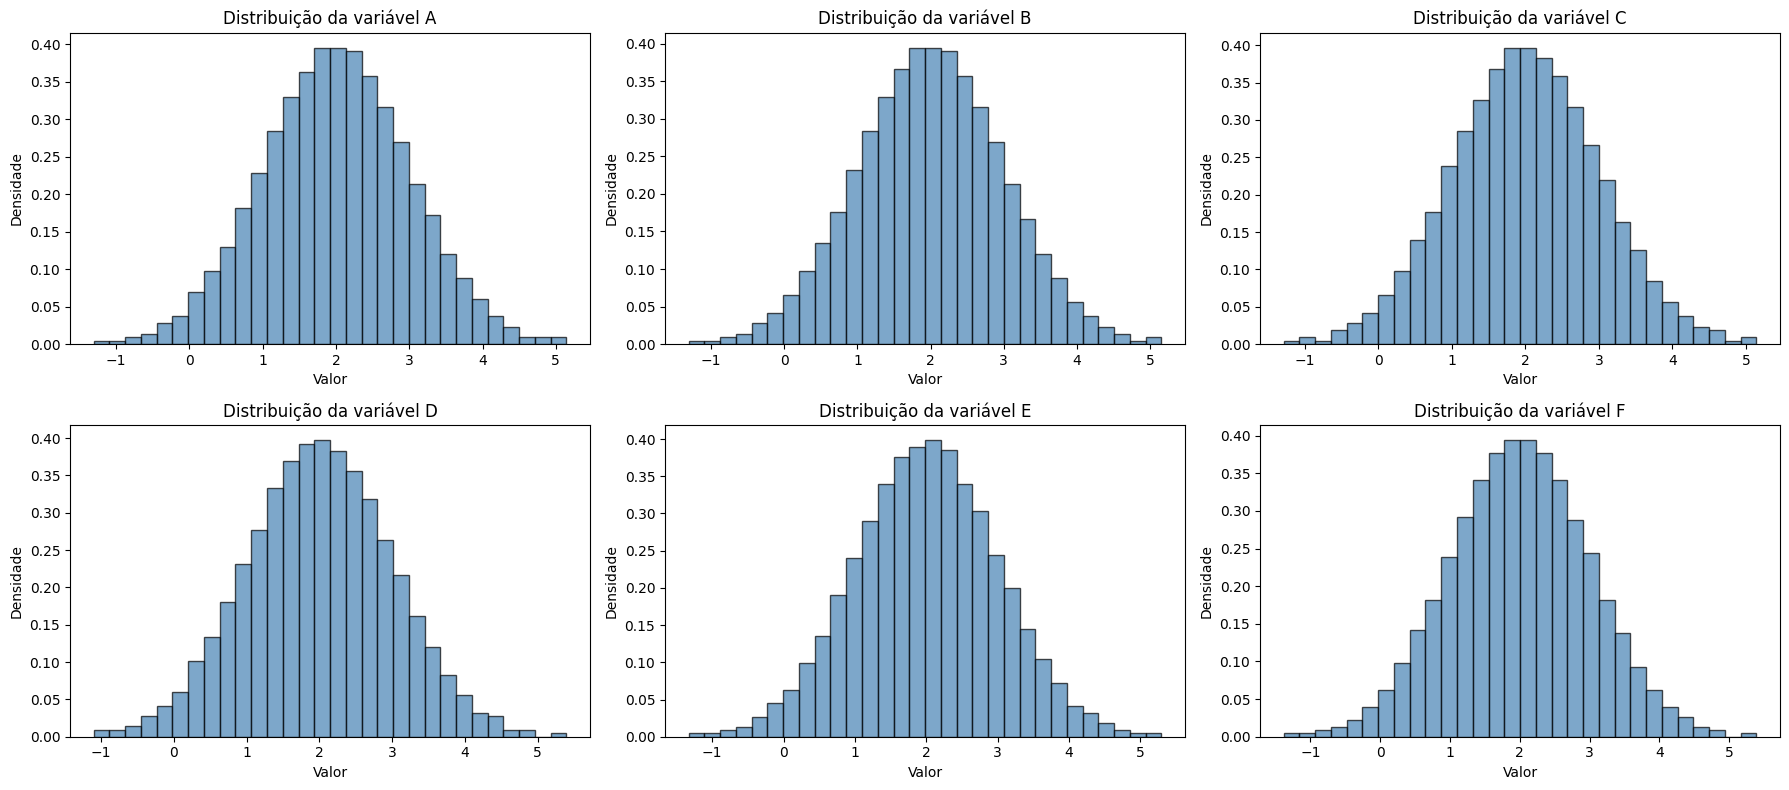

In [7]:
# Plotar histogramas

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=30, color='steelblue', alpha=0.7, edgecolor='black', density=True)
    axs[i].set_title(f'Distribuição da variável {col.upper()}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

In [8]:
# Criar nova coluna com a soma de todas as colunas
df["data_final"] = df.sum(axis=1)
df.head()

,a,b,c,d,e,f,data_final
0,0.796318,3.764859,2.773051,2.120699,3.118340,1.121159,13.694425
1,2.821667,0.995646,0.971355,3.101060,2.686466,1.364012,11.940206
2,3.210536,4.044385,3.607613,3.110682,1.406511,1.218436,16.598163
3,1.275718,1.874219,2.177624,2.370778,2.593111,2.746839,13.038290
4,-0.202392,2.263701,2.325054,1.666949,2.784602,3.407054,12.244968


In [9]:
# Criar a lista com as durações

duracoes = df["data_final"].tolist()
duracoes

[13.694425029697781,
 11.940205892099375,
 16.598163444975796,
 13.038289986359159,
 12.244968178608506,
 14.938079799824845,
 8.191833431613214,
 9.313833522781625,
 14.349773059813696,
 11.794857709349142,
 12.740552988377015,
 10.52963280338404,
 15.484299272152711,
 16.142412074521246,
 10.125076525262369,
 9.326358453536074,
 16.410679945949997,
 9.79518441717303,
 12.4558093192244,
 13.991856102561282,
 8.515258747547152,
 11.660960007826613,
 12.235887976496635,
 7.020857683510982,
 9.91092531609484,
 8.878505430581466,
 8.760812313998137,
 12.862885615020193,
 7.647896063001101,
 12.315285973919405,
 14.935664780635905,
 15.78423526691722,
 10.134189085891931,
 11.890913986682525,
 11.289477381593523,
 6.170089216952256,
 8.868168975772331,
 10.99817741058894,
 12.3340025838076,
 11.279927511479269,
 9.580001606499003,
 11.42509284827577,
 16.50452304869215,
 9.327078924543962,
 13.442727991768535,
 9.51610578419055,
 15.62529135965456,
 14.018273942808865,
 15.789814411793177,